# RFM Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [6]:
df = pd.read_csv('../../data/cleaned_data.csv')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'TotalPrice'],
      dtype='object')

In [8]:
# Calculating Recency, Frequency, and Monetary

current_date = df['InvoiceDate'].max()
current_date

recency = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (current_date - recency).dt.days

# Frequency
frequency = df.groupby('CustomerID')['InvoiceDate'].nunique()

# Monetary
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

In [9]:
# Combining the Recency, Frequency, and Monetary in one useable dataframe

rfm_df = pd.DataFrame({

    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

In [10]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,292,1,77183.60
12347.0,6,6,4085.18
12348.0,42,4,1797.24
12350.0,276,1,334.40
12352.0,3,8,2506.04
12353.0,170,1,89.00
12354.0,199,1,1079.40
12355.0,181,1,459.40
12356.0,212,2,2753.08


In [11]:
# Merging the values of 'InvoiceDate' in the rfm_df

rfm = pd.merge(rfm_df, df[['CustomerID','InvoiceDate']],on = 'CustomerID', how = 'inner')
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,InvoiceDate
0,12346.0,292,1,77183.60,2023-01-18 10:01:00
1,12347.0,6,6,4085.18,2022-12-07 14:57:00
2,12347.0,6,6,4085.18,2022-12-07 14:57:00
3,12347.0,6,6,4085.18,2022-12-07 14:57:00
4,12347.0,6,6,4085.18,2022-12-07 14:57:00


### Visualising the RFM data

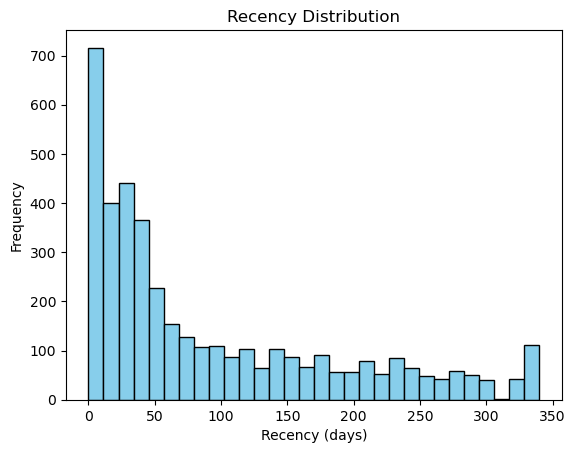

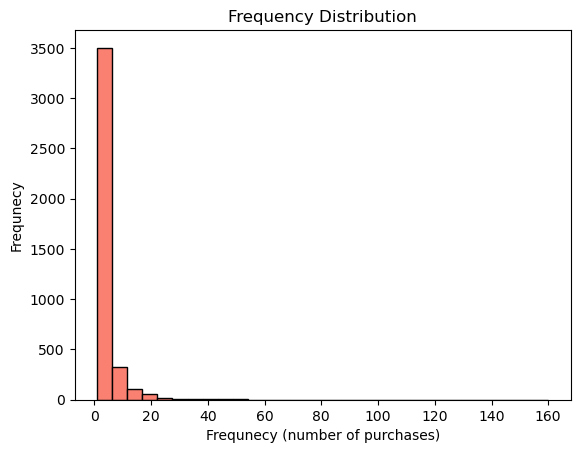

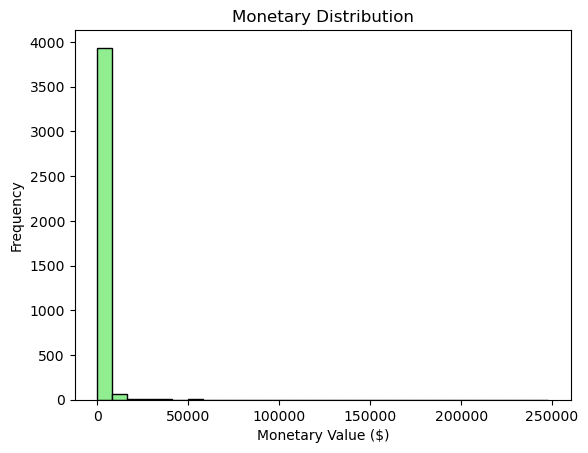

In [12]:


# Plotting a histogram for Recency

plt.hist(rfm_df['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Frequency

plt.hist(rfm_df['Frequency'], bins = 30, color = 'salmon', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequnecy (number of purchases)')
plt.ylabel('Frequnecy')
plt.show()

# Plotting a histogram for Monetary
plt.hist(rfm_df['Monetary'], bins = 30, color = 'lightgreen', edgecolor = 'black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.show()


            Recency  Frequency  Monetary
Recency    1.000000  -0.261158 -0.122963
Frequency -0.261158   1.000000  0.558060
Monetary  -0.122963   0.558060  1.000000


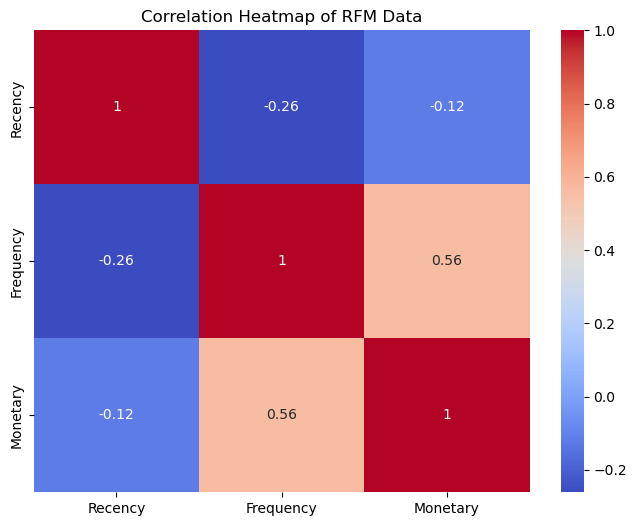

In [13]:
# Ploting a Heatmap, to visualise the correlation between the RFM variables

rfm_corr = rfm_df[['Recency', 'Frequency','Monetary']].corr()

print(rfm_corr)
# Creating the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(rfm_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of RFM Data')
plt.show()

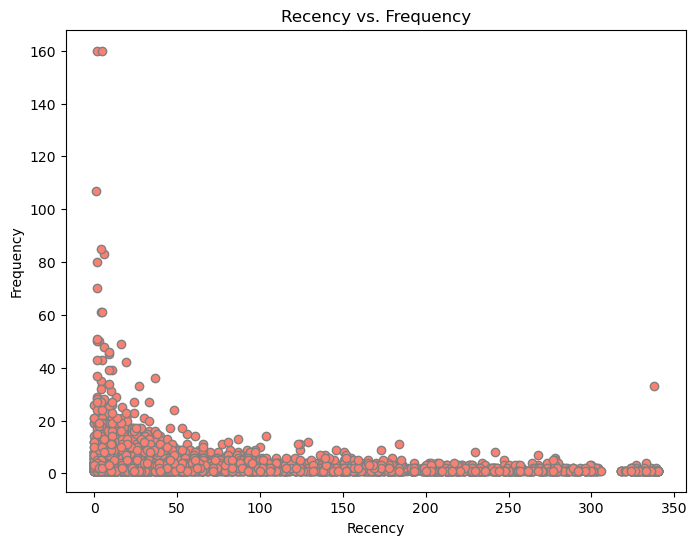

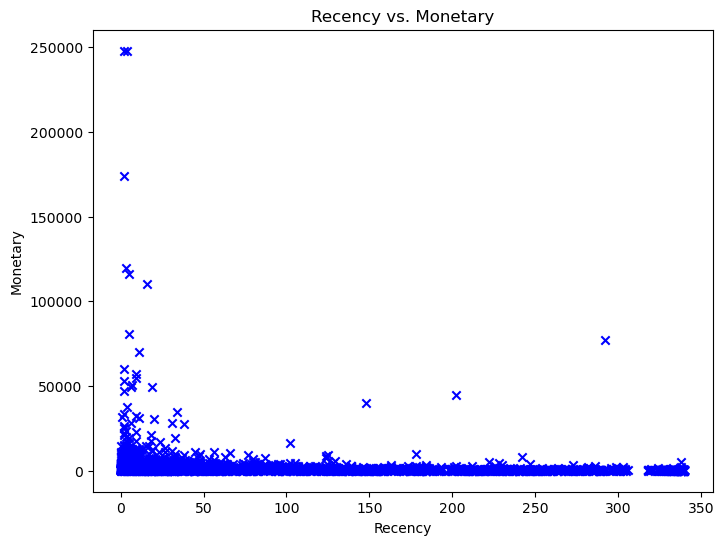

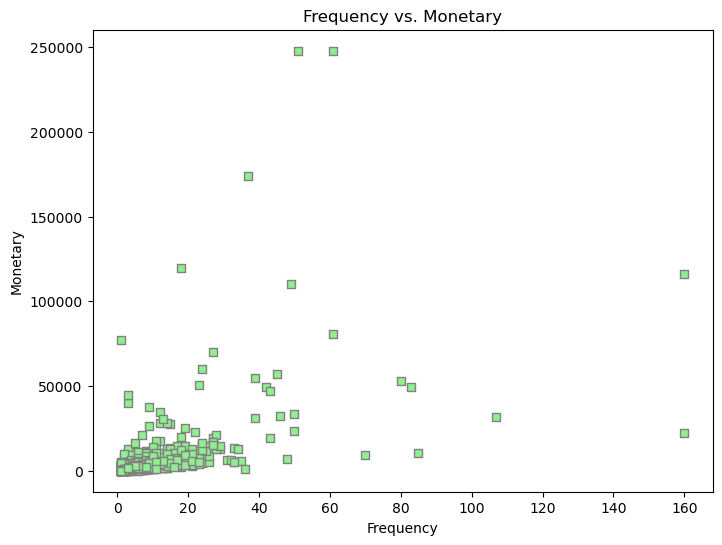

In [14]:
# Scatter plot
# R vs. F
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], color = 'salmon', marker = 'o', edgecolor='gray')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# R vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], color = 'blue', marker = 'x')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

# F vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], color = 'lightgreen', marker = 's', edgecolor='gray')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

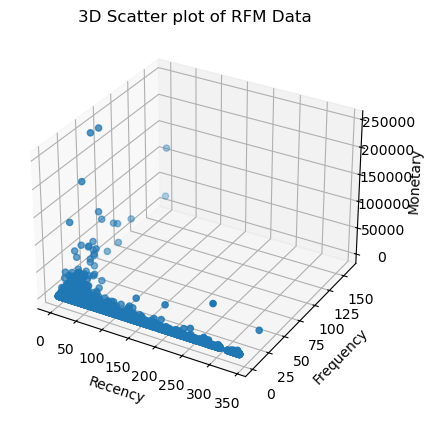

In [15]:
# Plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('3D Scatter plot of RFM Data')
plt.show()

In [16]:
# Calculating the Customer Scores

rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4],duplicates='drop')  
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])  

# Combining the scores into one RFM score
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

In [17]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,4042.000000,4042.000000,4042.000000
mean,92.911183,3.822613,1837.829266
std,94.618348,6.624922,8007.147207
min,0.000000,1.000000,2.900000
25%,19.000000,1.000000,290.877500
50%,51.000000,2.000000,627.770000
75%,150.000000,4.000000,1531.822500
max,340.000000,160.000000,247885.680000


In [18]:
print(rfm_df['RFMScore'].dtype)

object


In [19]:
#Converting the RFMScore Column to int

rfm_df['RFMScore'] = pd.to_numeric(rfm_df['RFMScore'])
print(rfm_df['RFMScore'].dtype)
rfm_df.head(10)

int64


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12346.0,292,1,77183.60,1,1,5,115
12347.0,6,6,4085.18,5,4,5,545
12348.0,42,4,1797.24,3,3,4,334
12350.0,276,1,334.40,1,1,2,112
12352.0,3,8,2506.04,5,4,5,545
12353.0,170,1,89.00,2,1,1,211
12354.0,199,1,1079.40,1,1,4,114
12355.0,181,1,459.40,1,1,3,113
12356.0,212,2,2753.08,1,1,5,115


In [20]:
# Segementing Customers

def segment_customer_based_on_rfm_score(row):
    if row['RFMScore'] >= 500:
        return 'Champions'
    elif 400 <= row['RFMScore'] < 500:
        return 'Loyal Customers'
    elif 300 <= row['RFMScore'] < 400:
        return 'Potential Loyalists'
    elif 200 <= row['RFMScore'] < 300:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm_df['Segment'] = rfm_df.apply(segment_customer_based_on_rfm_score, axis=1)

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
12346.0,292,1,77183.60,1,1,5,115,Lost Customers
12347.0,6,6,4085.18,5,4,5,545,Champions
12348.0,42,4,1797.24,3,3,4,334,Potential Loyalists
12350.0,276,1,334.40,1,1,2,112,Lost Customers
12352.0,3,8,2506.04,5,4,5,545,Champions


In [21]:
rfm_df = rfm_df.sort_values('RFMScore', ascending = False)
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
14659.0,2,8,2380.53,5,4,5,545,Champions
15527.0,5,7,2249.44,5,4,5,545,Champions
12682.0,5,25,10051.60,5,4,5,545,Champions
12681.0,10,18,11269.23,5,4,5,545,Champions
16558.0,4,18,6888.46,5,4,5,545,Champions


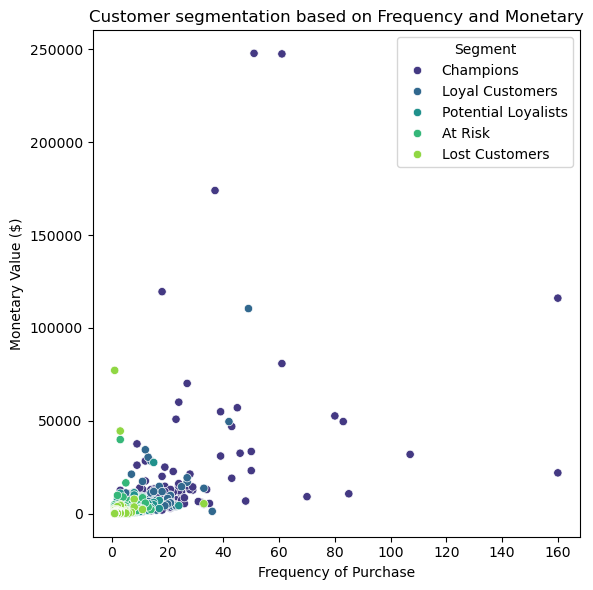

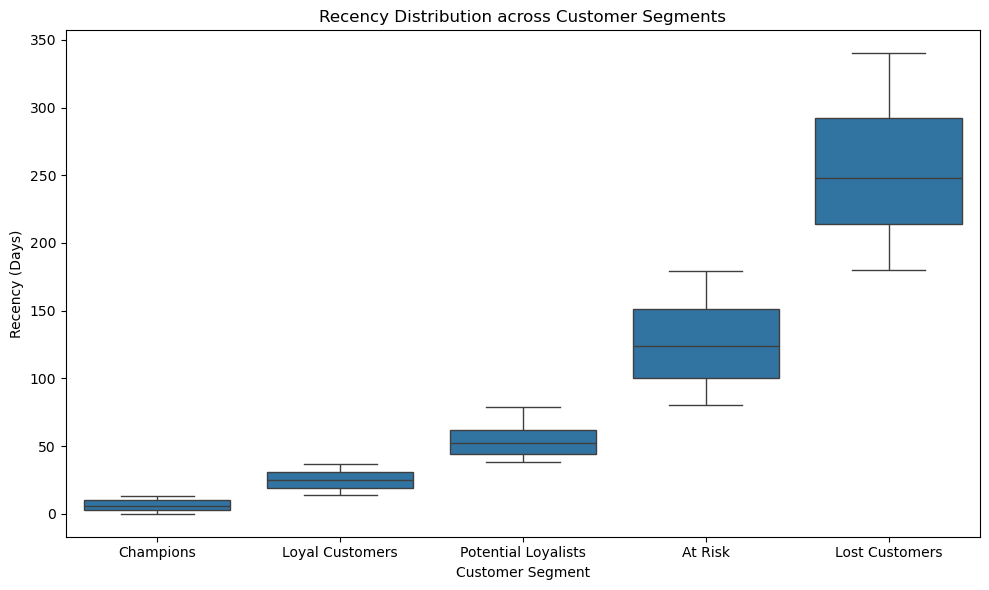

In [22]:
# Visualising the segments

plt.figure(figsize=(6,6))

# Scatter plot of Frequecy vs. Monetary, colored by segment
sns.scatterplot(x = 'Frequency', y='Monetary', hue = 'Segment', data = rfm_df, palette='viridis')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Monetary Value ($)')
plt.tight_layout()
plt.show()

# Plot distribution of Recency scores across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Recency', data=rfm_df)
plt.title('Recency Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.tight_layout()
plt.show()

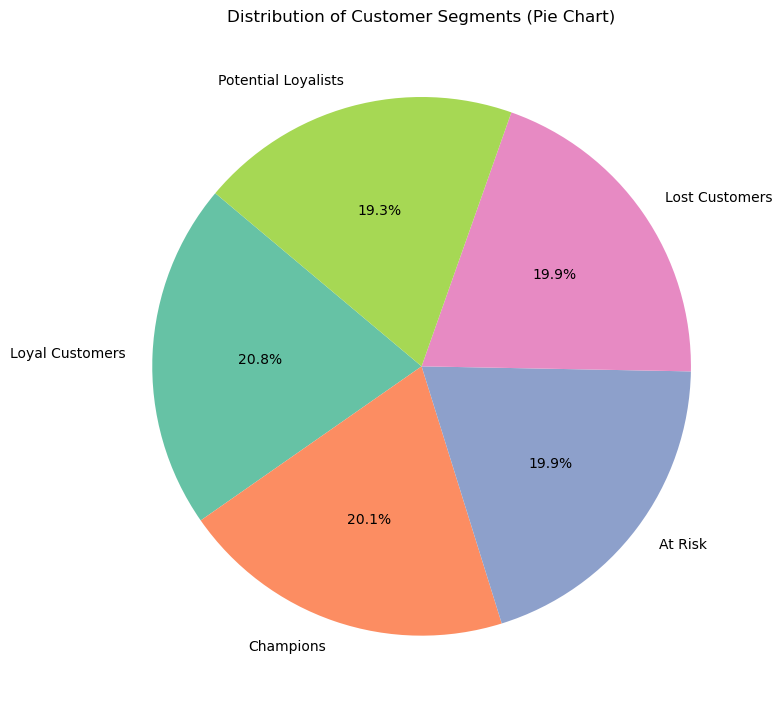

In [23]:
# Pie Chart of cutomer segments
segment_counts = rfm_df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.tight_layout()
plt.show()

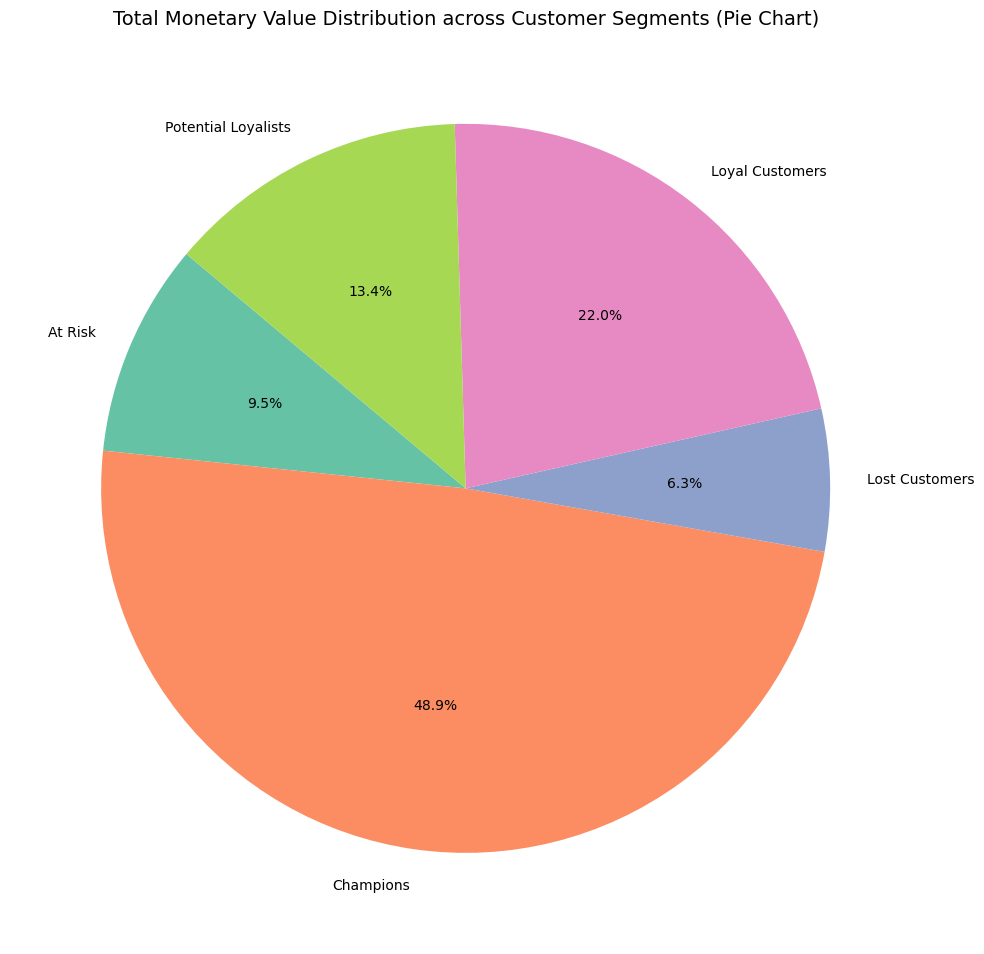

In [24]:
#Pie chart showing the distribution of the cutomer segments based on monetary expenditure

monetary_per_segment = rfm_df.groupby('Segment')['Monetary'].sum()
plt.figure(figsize=(10, 10))
plt.pie(monetary_per_segment, labels=monetary_per_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Total Monetary Value Distribution across Customer Segments (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()